### 이미지 로데이터 파일에서 데이터 추출


In [9]:
## [1] 파일 입출력 방식
## with open() as ~

file_path = "../data/MNIST/t10k-images.idx3-ubyte"


In [10]:
# 파일 읽을 때 고려사항 => mode  = rb : 바이트 읽기 모드
with open(file_path, "rb") as f:
    all_data = f.read()


In [11]:
print(type(all_data), len(all_data))
print(all_data[:100])


<class 'bytes'> 7840016
b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"


In [13]:
# 파일 읽을 때 고려사항 => mode  = rb : 바이트 읽기 모드
with open(file_path, "rb") as f:
    magic_code = f.read(4)
    print(magic_code)

    data_length = f.read(4)
    print(data_length)

    row = f.read(4)
    print(row)

    col = f.read(4)
    print(col)


b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


-   [2] 파이썬의 byte 데이터 변환 모듈 struct 활용


In [38]:
### ===> 데이터 추출 및 저장 관련 변수
### 학습용 : train.csv
### 테스트용 : test.csv
### 위치 : ../data/text/

save_dir = "../data/text/"
data_dir = "../data/MNIST/"
train_file = data_dir + "train.csv"
test_file = data_dir + "test.csv"


In [39]:
### 사용자 정의 함수 -------------------------------------------------------------
### 기    능 : raw data 파일을 읽어서 csv파일로 저장
### 함 수 명 : to_csv
### 매개변수 : 파일이름, 데이터수
### 반 환 값 : 파일 생성 여부 True/False
### ------------------------------------------------------------------------------

### ===> 모듈 로딩
import os, struct

# 디버깅용 변수
DEBUG = False


# CSV 변환 기능 함수
def to_csv(name, max_data):
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(data_dir + name + "-labels.idx1-ubyte", "rb")
    img_f = open(data_dir + name + "-images.idx3-ubyte", "rb")

    # CSV 파일 생성
    csv_f = open(save_dir + name + ".csv", "w", encoding="utf-8")

    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))  # 매직 코드 + 레이블 갯수
    mag, img_count = struct.unpack(">II", img_f.read(8))  # 매직 코드 + 이미지 갯수
    row, col = struct.unpack(">II", img_f.read(8))  # 행, 열 갯수
    pixels = row * col

    if DEBUG:
        print(f"lbl_count {lbl_count}, img_count {img_count}")
        print(f"rows {row}, cols {col}")

    # (2) 이미지 데이터를 읽고 CSV로 저장
    for idx in range(lbl_count):
        if idx > max_data:
            break

        # 숫자이미지 데이터가 의미하는 숫자값 읽기
        # 튜플타입 리턴 -> 1개 데이터 (value,)
        label = struct.unpack("B", lbl_f.read(1))[0]
        if DEBUG:
            print(f"label {label}")

        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        if DEBUG:
            print(f"sdata => {sdata}")

        # CSV 파일에 쓰기 => 라벨 , 데이터1, 데이터2, ..., 데이터 784
        csv_f.write(str(label) + ",")  # 숫자 라벨 쓰기
        csv_f.write(",".join(sdata) + "\n")  # 리스트 이미지 데이터 -> 문자열 변환 쓰기
    csv_f.close()
    lbl_f.close()
    img_f.close()

    # 생성된 파일 존재 여부 확인 후 반환
    return os.path.exists(save_dir + f"{name}.csv")


In [40]:
# 학습용 데이터파일 생성
to_csv("train", 10000)

# 테스트용 데이터 파일 생성
to_csv("t10k", 1000)


True

-   [3] 이미지 데이터 로딩 후 시각화 <hr>


-   [3-1] 이미지 데이터 로딩 csv => DataFrame


In [43]:
import pandas as pd
import numpy as np


In [50]:
trainDF = pd.read_csv(save_dir + "train.csv", header=None)
trainDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [52]:
trainDF.head(2)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# 이미지 데이터와 라벨 분리
labels = trainDF[0]
img_data = trainDF.drop(0, axis=1)

labels.shape, img_data.shape, img_data[:3]


((10001,),
 (10001, 784),
    1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
 0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 
 [3 rows x 784 columns])

-   [3-2] 데이터 시각화


In [53]:
import matplotlib.pyplot as plt


In [57]:
# 1D 이미지 데이터 => 2D 이미지 데이터 변환
raw_img = img_data.iloc[0].values

type(raw_img), raw_img.shape, raw_img.ndim


(numpy.ndarray, (784,), 1)

In [61]:
# (784,1) ====> (28,28)
raw_img = raw_img.reshape(-1, 28)

type(raw_img), raw_img.shape, raw_img.ndim


(numpy.ndarray, (28, 28), 2)

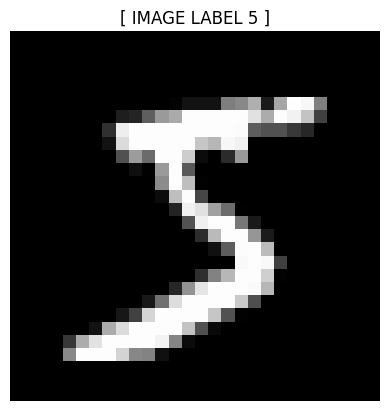

In [72]:
# 시각화
plt.imshow(raw_img, cmap="gray")
plt.title(f"[ IMAGE LABEL {labels[0]} ]")
plt.axis("off")
plt.show()
